In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

# **Datasets Reading** 

In [2]:
# x_train = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 70-30 X_Train.csv')

# x_test = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 70-30 X_Test.csv')

# y_train = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 70-30 Y_Train.csv')

# y_test = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 70-30 Y_Test.csv')

In [3]:
x_train = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 70-30 X_Train.csv')

x_test = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 70-30 X_Test.csv')

y_train = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 70-30 Y_Train.csv')

y_test = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 70-30 Y_Test.csv')

In [4]:
x_train

Gender       AGE      Urea        Cr     HbA1c      Chol        TG  \
0   -1.137388  1.814745  0.182859 -0.817762  0.174724  0.738038 -0.828922   
1   -1.137388  0.296521 -0.858001 -0.523476 -0.397482  1.191365  0.797658   
2    0.879208  1.706301  0.349396  0.153383  0.823224  0.360266 -0.828922   
3    0.879208  0.188077  0.016321  0.153383  0.556195 -1.301933 -0.751466   
4    0.879208 -0.354146 -0.108582 -0.111475 -0.893393  0.284711 -0.828922   
..        ...       ...       ...       ...       ...       ...       ...   
573  0.879208  0.188077  4.073954  2.331102 -0.092305  1.342474  1.030026   
574  0.879208 -2.523038 -0.025313  0.418241 -0.511923 -0.319725 -0.441641   
575  0.879208  0.188077  0.141224 -0.111475 -0.550070 -0.546388  1.030026   
576  0.879208 -0.137257  1.140450  5.668544 -0.206746 -1.075270 -0.828922   
577 -1.137388  0.730300 -0.858001 -0.700048 -0.778952  0.662484 -1.138747   

          HDL       LDL      VLDL       BMI  
0    0.519540 -1.710584 -0.419262  0.182855  
1   -0.604017 -0.018561 -0.174999  0.803333  
2    1.193675  0.438742 -0.419262  0.803333  
3   -0.379306  0.347282  0.150684  0.803333  
4   -0.379306  0.987506 -0.419262 -0.851276  
..        ...       ...       ...       ...  
573  1.193675 -0.567325 -0.052868  0.803333  
574  0.070117 -0.018561  4.506698  1.134255  
575 -0.379306 -0.933168  0.028553  1.010160  
576 -0.379306 -0.933168 -0.093578  0.803333  
577 -0.379306  1.627731 -0.500682 -0.437623  

[578 rows x 11 columns]

In [5]:
print(y_train['Class'].value_counts())

2    472
0     73
1     33
Name: Class, dtype: int64


# Information Gain using Mutual info classifier

In [6]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(x_train, y_train)

feat_importances = pd.Series(importances)
feat_importances.index = x_train.columns
feat_importances.sort_values(ascending=True)
#feat_importances.plot(kind='barh', color = 'teal')
#plt.show()
feat_importances.nlargest(11).plot(kind='barh', color = 'teal')

# **Ranking wise Feature Lists**

In [7]:
IG_Top_4_X = x_train[['HbA1c', 'BMI', 'AGE', 'Chol']]
IG_Top_5_X = x_train[['HbA1c', 'BMI', 'AGE', 'Chol', 'VLDL']]
IG_Top_7_X = x_train[['HbA1c', 'BMI', 'AGE', 'Chol', 'VLDL', 'TG', 'LDL']]
IG_Top_9_X = x_train[['HbA1c', 'BMI', 'AGE', 'Chol', 'VLDL', 'TG', 'LDL', 'Cr', 'HDL']]
x_train = IG_Top_9_X

In [8]:
IG_Top_4_X = x_test[['HbA1c', 'BMI', 'AGE', 'Chol']]
IG_Top_5_X = x_test[['HbA1c', 'BMI', 'AGE', 'Chol', 'VLDL']]
IG_Top_7_X = x_test[['HbA1c', 'BMI', 'AGE', 'Chol', 'VLDL', 'TG', 'LDL']]
IG_Top_9_X = x_test[['HbA1c', 'BMI', 'AGE', 'Chol', 'VLDL', 'TG', 'LDL', 'Cr', 'HDL']]
x_test = IG_Top_9_X

In [9]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

In [10]:
metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# Support Vector Classifier Train, Test 

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.9516129032258065
[[ 20   0   3]
 [  2   2   3]
 [  4   0 214]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        23
           1       1.00      0.29      0.44         7
           2       0.97      0.98      0.98       218

    accuracy                           0.95       248
   macro avg       0.91      0.71      0.75       248
weighted avg       0.95      0.95      0.95       248



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9546244078502143
f1 Score  0.9472155337315366
Recall  0.9516129032258065
Specificity/TNR: 1.0
Cohen Kappa: 0.7698731828023507
AUC Score  0.9710957003982342


In [15]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9516129032258065,
  0.9546244078502143,
  0.9516129032258065,
  0.9472155337315366,
  0.7698731828023507,
  0.9710957003982342]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(x_train, y_train)
GSCV_SVC.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.14031074, 0.02503808, 0.04418371, 0.04059949, 0.03681092,
        0.02443213, 0.02888627, 0.02888739, 0.05398517, 0.03829672,
        0.03819623, 0.03041322, 0.03512423, 0.03091996, 0.02383666,
        0.03271158, 0.03855834, 0.0273313 , 0.02151508, 0.02869551,
        0.14311342, 0.03348727, 0.05283148, 0.04254503, 0.03201377,
        0.02888203, 0.02782211, 0.03410671, 0.04617734, 0.05335662,
        0.03650177, 0.05056424, 0.04697409, 0.03381178, 0.02023754,
        0.03155224, 0.03550308, 0.03011808, 0.0260335 , 0.03177028,
        0.14650741, 0.03311455, 0.05195777, 0.04090111, 0.03241394,
        0.03052006, 0.0289212 , 0.02495861, 0.03111572, 0.03221643,
        0.02602849, 0.03041165, 0.03554924, 0.02973011, 0.01795523,
        0.02962239, 0.03428366, 0.03061755, 0.02181234, 0.02851925,
        0.14778244, 0.03849671, 0.05834193, 0.04876897, 0.04827061,
        0.05136211, 0.03560398, 0.02992222, 0.04318507, 0.04408062,
        0.03221292, 0.03849649,

In [17]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.140311      0.007036         0.004492        0.000503       1   
1         0.025038      0.002365         0.001989        0.000014       1   
2         0.044184      0.004083         0.001896        0.000300       1   
3         0.040599      0.002140         0.002791        0.000759       1   
4         0.036811      0.002461         0.002788        0.000860       1   
..             ...           ...              ...             ...     ...   
395       0.031314      0.002197         0.002090        0.000537      20   
396       0.037900      0.003976         0.002891        0.000834      20   
397       0.105818      0.019426         0.002591        0.001015      20   
398       0.021437      0.002003         0.002099        0.000298      20   
399       0.033298      0.002116         0.002497        0.000666      20   

    param_gamma param_kernel                                           params  \
0             1          rbf            {'C': 1, 'gamma': 1, 'kernel': 'rbf'}   
1             1       linear         {'C': 1, 'gamma': 1, 'kernel': 'linear'}   
2             1         poly           {'C': 1, 'gamma': 1, 'kernel': 'poly'}   
3             1      sigmoid        {'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}   
4           0.1          rbf          {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}   
..          ...          ...                                              ...   
395       0.001      sigmoid   {'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}   
396      0.0001          rbf      {'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}   
397      0.0001       linear   {'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}   
398      0.0001         poly     {'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}   
399      0.0001      sigmoid  {'C': 20, 'gamma': 0.0001, 'kernel': 'sigmoid'}   

     split0_test_score  split1_test_score  ...  split3_test_score  \
0             0.879310           0.862069  ...           0.913793   
1             0.931034           0.948276  ...           0.913793   
2             0.896552           0.913793  ...           0.948276   
3             0.758621           0.793103  ...           0.672414   
4             0.913793           0.913793  ...           0.913793   
..                 ...                ...  ...                ...   
395           0.896552           0.931034  ...           0.896552   
396           0.827586           0.827586  ...           0.810345   
397           0.931034           0.948276  ...           0.948276   
398           0.827586           0.827586  ...           0.810345   
399           0.827586           0.827586  ...           0.810345   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.879310           0.862069           0.879310   
1             0.862069           0.931034           0.913793   
2             0.896552           0.844828           0.844828   
3             0.758621           0.706897           0.758621   
4             0.879310           0.948276           0.913793   
..                 ...                ...                ...   
395           0.827586           0.931034           0.931034   
396           0.810345           0.810345           0.810345   
397           0.879310           0.931034           0.913793   
398           0.810345           0.810345           0.810345   
399           0.810345           0.810345           0.810345   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0             0.896552           0.877193           0.912281         0.880672   
1             0.931034           0.947368           0.929825         0.913581   
2             0.793103           0.912281           0.859649         0.863400   
3             0.655172           0.789474           0.789474         0.742377   
4             0.913793           0.947368           0.912281         0.910103   
..                 ... 

In [18]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

param_C param_kernel  mean_test_score
0         1          rbf         0.880672
1         1       linear         0.913581
2         1         poly         0.863400
3         1      sigmoid         0.742377
4         1          rbf         0.910103
..      ...          ...              ...
395      20      sigmoid         0.904991
396      20          rbf         0.816636
397      20       linear         0.918724
398      20         poly         0.816636
399      20      sigmoid         0.816636

[400 rows x 3 columns]

In [19]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.9376890502117362
{'C': 6, 'gamma': 0.1, 'kernel': 'rbf'}


In [20]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77        23
           1       1.00      0.43      0.60         7
           2       0.98      0.97      0.98       218

    accuracy                           0.95       248
   macro avg       0.89      0.76      0.78       248
weighted avg       0.95      0.95      0.95       248



In [21]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9549396448729041
f1 Score  0.9470534928131183
Recall  0.9475806451612904
Specificity/TNR: 1.0
Cohen Kappa: 0.7651515151515151
AUC Score  0.9638597608051601


In [22]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9376890502117362,
  0.9549396448729041,
  0.9475806451612904,
  0.9470534928131183,
  0.7651515151515151,
  0.9638597608051601]}

# Logistic Regression Train, Test

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.919
Testing Accuracy: 0.940
[[ 21   1   1]
 [  3   1   3]
 [  6   1 211]]
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        23
           1       0.33      0.14      0.20         7
           2       0.98      0.97      0.97       218

    accuracy                           0.94       248
   macro avg       0.67      0.67      0.66       248
weighted avg       0.94      0.94      0.94       248



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9370061265316328
f1 Score  0.9358399550757008
Recall  0.9395161290322581
Specificity/TNR: 0.9545454545454546
Cohen Kappa: 0.7328162034044388
AUC Score  0.9773296061506169


In [25]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9516129032258065,
  0.9546244078502143,
  0.9516129032258065,
  0.9472155337315366,
  0.7698731828023507,
  0.9710957003982342],
 'LR': [0.9395161290322581,
  0.9370061265316328,
  0.9395161290322581,
  0.9358399550757008,
  0.7328162034044388,
  0.9773296061506169]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [26]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(x_train, y_train)
GSCV_LR.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.00838101, 0.02986131, 0.00418813, 0.0216007 , 0.00927672,
        0.02961943, 0.00460577, 0.02178204, 0.01043346, 0.03091879,
        0.00500054, 0.02613091, 0.01266279, 0.04278512, 0.00737677,
        0.0300195 , 0.01416118, 0.03680096, 0.00688024, 0.03101411,
        0.01605642, 0.04966755, 0.00927494, 0.03031695, 0.01306806,
        0.03299723, 0.00687871, 0.02284107, 0.01246927, 0.03350759,
        0.00509169, 0.02452962, 0.01216822, 0.03521111, 0.00648212,
        0.03081656, 0.01367505, 0.03580844, 0.00548971, 0.03909693]),
 'std_fit_time': array([0.00162364, 0.00228456, 0.00059912, 0.0007744 , 0.00045611,
        0.00214499, 0.000676  , 0.0012285 , 0.00083537, 0.00227794,
        0.00044296, 0.00344605, 0.00089715, 0.00440603, 0.00065171,
        0.00322932, 0.00159608, 0.00269269, 0.00113262, 0.00326046,
        0.0023794 , 0.013319  , 0.00204764, 0.00569752, 0.00210811,
        0.00194988, 0.0015721 , 0.00150841, 0.00155815, 0.00249005,
        0.000

In [27]:
df_lr_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_lr_grid

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.140311      0.007036         0.004492        0.000503       1   
1         0.025038      0.002365         0.001989        0.000014       1   
2         0.044184      0.004083         0.001896        0.000300       1   
3         0.040599      0.002140         0.002791        0.000759       1   
4         0.036811      0.002461         0.002788        0.000860       1   
..             ...           ...              ...             ...     ...   
395       0.031314      0.002197         0.002090        0.000537      20   
396       0.037900      0.003976         0.002891        0.000834      20   
397       0.105818      0.019426         0.002591        0.001015      20   
398       0.021437      0.002003         0.002099        0.000298      20   
399       0.033298      0.002116         0.002497        0.000666      20   

    param_gamma param_kernel                                           params  \
0             1          rbf            {'C': 1, 'gamma': 1, 'kernel': 'rbf'}   
1             1       linear         {'C': 1, 'gamma': 1, 'kernel': 'linear'}   
2             1         poly           {'C': 1, 'gamma': 1, 'kernel': 'poly'}   
3             1      sigmoid        {'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}   
4           0.1          rbf          {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}   
..          ...          ...                                              ...   
395       0.001      sigmoid   {'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}   
396      0.0001          rbf      {'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}   
397      0.0001       linear   {'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}   
398      0.0001         poly     {'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}   
399      0.0001      sigmoid  {'C': 20, 'gamma': 0.0001, 'kernel': 'sigmoid'}   

     split0_test_score  split1_test_score  ...  split3_test_score  \
0             0.879310           0.862069  ...           0.913793   
1             0.931034           0.948276  ...           0.913793   
2             0.896552           0.913793  ...           0.948276   
3             0.758621           0.793103  ...           0.672414   
4             0.913793           0.913793  ...           0.913793   
..                 ...                ...  ...                ...   
395           0.896552           0.931034  ...           0.896552   
396           0.827586           0.827586  ...           0.810345   
397           0.931034           0.948276  ...           0.948276   
398           0.827586           0.827586  ...           0.810345   
399           0.827586           0.827586  ...           0.810345   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.879310           0.862069           0.879310   
1             0.862069           0.931034           0.913793   
2             0.896552           0.844828           0.844828   
3             0.758621           0.706897           0.758621   
4             0.879310           0.948276           0.913793   
..                 ...                ...                ...   
395           0.827586           0.931034           0.931034   
396           0.810345           0.810345           0.810345   
397           0.879310           0.931034           0.913793   
398           0.810345           0.810345           0.810345   
399           0.810345           0.810345           0.810345   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0             0.896552           0.877193           0.912281         0.880672   
1             0.931034           0.947368           0.929825         0.913581   
2             0.793103           0.912281           0.859649         0.863400   
3             0.655172           0.789474           0.789474         0.742377   
4             0.913793           0.947368           0.912281         0.910103   
..                 ... 

In [28]:
df_lr_grid[['param_C', 'param_kernel', 'mean_test_score']]

param_C param_kernel  mean_test_score
0         1          rbf         0.880672
1         1       linear         0.913581
2         1         poly         0.863400
3         1      sigmoid         0.742377
4         1          rbf         0.910103
..      ...          ...              ...
395      20      sigmoid         0.904991
396      20          rbf         0.816636
397      20       linear         0.918724
398      20         poly         0.816636
399      20      sigmoid         0.816636

[400 rows x 3 columns]

In [29]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.9135511191772535
{'C': 2.7825594022071245, 'penalty': 'l1', 'solver': 'saga'}


In [30]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        23
           1       0.33      0.14      0.20         7
           2       0.98      0.97      0.97       218

    accuracy                           0.94       248
   macro avg       0.67      0.67      0.66       248
weighted avg       0.94      0.94      0.94       248



In [31]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9370061265316328
f1 Score  0.9358399550757008
Recall  0.9395161290322581
Specificity/TNR: 0.9545454545454546
Cohen Kappa: 0.7328162034044388
AUC Score  0.9760133137237909


In [32]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9376890502117362,
  0.9549396448729041,
  0.9475806451612904,
  0.9470534928131183,
  0.7651515151515151,
  0.9638597608051601],
 'LR': [0.9135511191772535,
  0.9370061265316328,
  0.9395161290322581,
  0.9358399550757008,
  0.7328162034044388,
  0.9760133137237909]}

# KNN Train, Test

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.9475806451612904
0.9475806451612904
[[ 21   0   2]
 [  1   2   4]
 [  4   2 212]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.50      0.29      0.36         7
           2       0.97      0.97      0.97       218

    accuracy                           0.95       248
   macro avg       0.76      0.72      0.73       248
weighted avg       0.94      0.95      0.94       248



C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

In [34]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.9438585607940446
f1 Score  0.9445957268537913
Recall  0.9475806451612904
Specificity/TNR: 1.0
Cohen Kappa: 0.7585742099745394
AUC Score  0.9576823743985567


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [35]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9516129032258065,
  0.9546244078502143,
  0.9516129032258065,
  0.9472155337315366,
  0.7698731828023507,
  0.9710957003982342],
 'LR': [0.9395161290322581,
  0.9370061265316328,
  0.9395161290322581,
  0.9358399550757008,
  0.7328162034044388,
  0.9773296061506169],
 'KNN': [0.9475806451612904,
  0.9438585607940446,
  0.9475806451612904,
  0.9445957268537913,
  0.7585742099745394,
  0.9576823743985567]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [36]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(x_train, y_train)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.01027181, 0.00847659, 0.00718074, 0.00737925, 0.00747998,
        0.00628302, 0.00807793, 0.00777934, 0.00857711, 0.00678136,
        0.00738008, 0.0064821 , 0.00668173, 0.00598419, 0.0073797 ,
        0.00887568, 0.00658231, 0.00718036, 0.00648265, 0.0064815 ,
        0.00708158, 0.00718081, 0.005984  , 0.00608332, 0.00648301,
        0.00618355, 0.00678134, 0.00738025, 0.00787823, 0.00658221,
        0.00598354, 0.00628297, 0.00588403, 0.00608392, 0.00628307,
        0.0083775 , 0.00867622, 0.00678089, 0.00688105, 0.00787883,
        0.0092747 , 0.00618434, 0.0063822 , 0.00618241, 0.00598319,
        0.00757914, 0.00787868, 0.00668132, 0.00728071, 0.00668173,
        0.0062824 , 0.00777948, 0.00698113, 0.00698085, 0.0085768 ,
        0.00697994, 0.00787923, 0.00857561, 0.00678146, 0.00827742,
        0.00857575, 0.00728023, 0.00598359, 0.0065819 , 0.00817814,
        0.00618303, 0.0072799 , 0.01047158, 0.00847726, 0.00857728,
        0.00787952, 0.01116936,

In [37]:
df_lr_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_lr_grid

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.010272      0.002320         0.010572        0.001557   
1         0.008477      0.001496         0.005486        0.000669   
2         0.007181      0.001163         0.009574        0.001954   
3         0.007379      0.001493         0.006084        0.003007   
4         0.007480      0.002371         0.007879        0.000941   
..             ...           ...              ...             ...   
115       0.009674      0.005316         0.013065        0.010866   
116       0.017154      0.012147         0.011769        0.003449   
117       0.009275      0.003059         0.005884        0.001442   
118       0.019248      0.014664         0.009375        0.000661   
119       0.010272      0.006149         0.009874        0.008009   

    param_metric param_n_neighbors param_weights  \
0      minkowski                 1       uniform   
1      minkowski                 1      distance   
2      minkowski                 2       uniform   
3      minkowski                 2      distance   
4      minkowski                 3       uniform   
..           ...               ...           ...   
115    manhattan                18      distance   
116    manhattan                19       uniform   
117    manhattan                19      distance   
118    manhattan                20       uniform   
119    manhattan                20      distance   

                                                params  split0_test_score  \
0    {'metric': 'minkowski', 'n_neighbors': 1, 'wei...           0.862069   
1    {'metric': 'minkowski', 'n_neighbors': 1, 'wei...           0.862069   
2    {'metric': 'minkowski', 'n_neighbors': 2, 'wei...           0.913793   
3    {'metric': 'minkowski', 'n_neighbors': 2, 'wei...           0.862069   
4    {'metric': 'minkowski', 'n_neighbors': 3, 'wei...           0.879310   
..                                                 ...                ...   
115  {'metric': 'manhattan', 'n_neighbors': 18, 'we...           0.931034   
116  {'metric': 'manhattan', 'n_neighbors': 19, 'we...           0.913793   
117  {'metric': 'manhattan', 'n_neighbors': 19, 'we...           0.931034   
118  {'metric': 'manhattan', 'n_neighbors': 20, 'we...           0.913793   
119  {'metric': 'manhattan', 'n_neighbors': 20, 'we...           0.931034   

     split1_test_score  ...  split3_test_score  split4_test_score  \
0             0.913793  ...           0.965517           0.879310   
1             0.913793  ...           0.965517           0.879310   
2             0.948276  ...           0.913793           0.879310   
3             0.913793  ...           0.965517           0.879310   
4             0.896552  ...           0.931034           0.844828   
..                 ...  ...                ...                ...   
115           0.931034  ...           0.948276           0.896552   
116           0.913793  ...           0.913793           0.862069   
117           0.931034  ...           0.948276           0.862069   
118           0.913793  ...           0.913793           0.862069   
119           0.931034  ...           0.931034           0.862069   

     split5_test_score  split6_test_score  split7_test_score  \
0             0.913793           0.879310           0.896552   
1             0.913793           0.879310           0.896552   
2             0.896552           0.913793           0.810345   
3             0.913793           0.879310           0.896552   
4             0.896552           0.896552           0.862069   
..                 ...                ...                ...   
115           0.965517           0.896552           0.965517   
116           0.931034           0.913793           0.913793   
117           0.948276           0.913793           0.982759   
118           0.931034           0.913793           0.913793   
119           0.948276           0.896552           0.965517   

     split8_test_score  spli

In [38]:
df_lr_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

param_metric param_n_neighbors  mean_test_score
0      minkowski                 1         0.894465
1      minkowski                 1         0.894465
2      minkowski                 2         0.887538
3      minkowski                 2         0.894465
4      minkowski                 3         0.884120
..           ...               ...              ...
115    manhattan                18         0.927344
116    manhattan                19         0.908348
117    manhattan                19         0.925620
118    manhattan                20         0.908348
119    manhattan                20         0.920448

[120 rows x 3 columns]

In [39]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.9412280701754387
{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


In [40]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        23
           1       1.00      0.57      0.73         7
           2       0.99      0.98      0.98       218

    accuracy                           0.96       248
   macro avg       0.91      0.82      0.84       248
weighted avg       0.96      0.96      0.96       248



In [41]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9646057347670252
f1 Score  0.9597324692813461
Recall  0.9596774193548387
Specificity/TNR: 1.0
Cohen Kappa: 0.8195576251455181
AUC Score  0.9902107624305637


In [42]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9376890502117362,
  0.9549396448729041,
  0.9475806451612904,
  0.9470534928131183,
  0.7651515151515151,
  0.9638597608051601],
 'LR': [0.9135511191772535,
  0.9370061265316328,
  0.9395161290322581,
  0.9358399550757008,
  0.7328162034044388,
  0.9760133137237909],
 'KNN': [0.9412280701754387,
  0.9646057347670252,
  0.9596774193548387,
  0.9597324692813461,
  0.8195576251455181,
  0.9902107624305637]}

# Result of all classifiers

In [43]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


Metrics       SVC        LR       KNN
0     Accuracy  0.951613  0.939516  0.947581
1    Precision  0.954624  0.937006  0.943859
2       Recall  0.951613  0.939516  0.947581
3     F1 Score  0.947216  0.935840  0.944596
4  Cohen Kappa  0.769873  0.732816  0.758574
5          AUC  0.971096  0.977330  0.957682

# Result of all classifiers after hyperparameter tuning 

In [44]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

Metrics       SVC        LR       KNN
0     Accuracy  0.937689  0.913551  0.941228
1    Precision  0.954940  0.937006  0.964606
2       Recall  0.947581  0.939516  0.959677
3     F1 Score  0.947053  0.935840  0.959732
4  Cohen Kappa  0.765152  0.732816  0.819558
5          AUC  0.963860  0.976013  0.990211

# Extracting Result

In [45]:
performance_df = performance_df.transpose()
# performance_df.to_csv("CSV/FS 70-30 Applying IG Top 9 features.csv")

performance_df_grid = performance_df_grid.transpose()
# performance_df_grid.to_csv("CSV/FS 70-30 Applying Hyperparameter IG Top 9 features.csv")

# ROC Curve

In [46]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

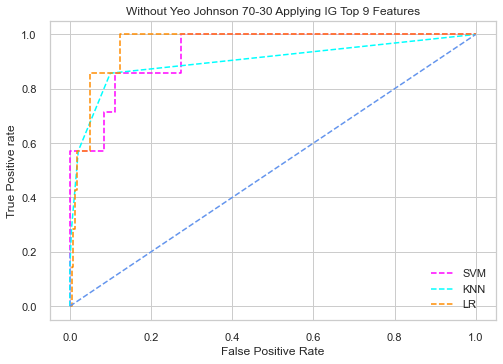

In [47]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('FS 70-30 Applying IG Top 9 Features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig("ROC/FS 70-30 Applying IG Top 9 Features.png", dpi=300)

plt.show();